In [98]:
%run Common.ipynb

import os.path
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [115]:
class1 = ['comp.sys.ibm.pc.hardware', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.os.ms-windows.misc']
class2 = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

categories = class1 + class2

dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

vectorizer = CountVectorizer(min_df=3, stop_words = 'english')

data_count = vectorizer.fit_transform(dataset.data)

In [119]:
data_count.shape

(7882, 27768)

In [124]:
tf = np.array(np.sum(data_count, axis=0)).flatten()

In [140]:
from collections import Counter
tf_count = Counter(tf)

In [53]:
import pandas as pd

In [139]:
df = pd.DataFrame.from_dict(tf_count, orient='index')
df.sort_index(inplace=True)
df.rename_axis("Term Frequencies", inplace=True)
df.columns = ['Number of Words']

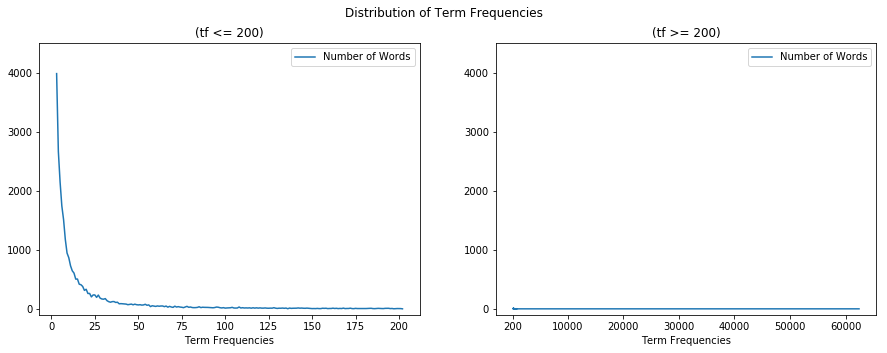

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('Distribution of Term Frequencies')
df[0:200].plot(ax=axes[0], ylim=(-100.0,4500), title="(tf <= 200)")
_ = df[200:].plot(ax=axes[1], ylim=(-100.0,4500), xticks=[200,10000,20000,30000,40000,50000,60000], title="(tf >= 200)")


In [128]:

tfidf_vect = TfidfVectorizer(min_df=3, stop_words = 'english')
tfidf_vect.fit(dataset.data)
data_tfidf = tfidf_vect.transform(dataset.data)

In [131]:
tfidf_vect.idf_

array([4.45501092, 4.62535629, 8.18070435, ..., 7.57456855, 6.97673155,
       7.77523924])

In [138]:
np.unique(data_tfidf[0].todense().tolist())

array([0.        , 0.01016308, 0.01019666, 0.01038597, 0.0178832 ,
       0.01789423, 0.01869163, 0.02230462, 0.02343852, 0.02958413,
       0.03082676, 0.03123876, 0.03204968, 0.03405707, 0.03633844,
       0.03645771, 0.03663055, 0.03666548, 0.03671809, 0.03673569,
       0.03680639, 0.03700339, 0.03742807, 0.03775377, 0.03850095,
       0.03914988, 0.04012645, 0.04090059, 0.04108806, 0.04150181,
       0.04155827, 0.04164356, 0.04238356, 0.04285488, 0.04301698,
       0.04328183, 0.04390425, 0.04445374, 0.04475942, 0.04531753,
       0.04563078, 0.04599532, 0.04658138, 0.04681611, 0.0471541 ,
       0.04720332, 0.04730247, 0.04750373, 0.04824127, 0.04829606,
       0.04909581, 0.04933637, 0.04939741, 0.0495206 , 0.05009422,
       0.05022621, 0.05042746, 0.05049544, 0.05067646, 0.05112864,
       0.05142325, 0.0525273 , 0.05330613, 0.05367241, 0.05386062,
       0.05424783, 0.05608106, 0.05632021, 0.05656511, 0.05747197,
       0.05861832, 0.05940655, 0.06159275, 0.06222159, 0.06244